<a href="https://colab.research.google.com/github/GokulKrishna2017/Proj/blob/main/IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
file_path = "/content/drive/MyDrive/dataset/sensor_log.csv"
folder_path = "/content/drive/MyDrive/dataset"

In [24]:
import os

if os.path.exists(file_path):
  print(True)
else:
  print(False)

True


In [25]:
import pandas as pd

In [26]:
df = pd.read_csv(file_path, header=None)
df.columns = ['accX', 'accY', 'accZ']

In [41]:
df.shape

(55, 3)

In [27]:
df.head()

,accX,accY,accZ
0,0.009369,0.003214,-0.033488
1,0.020568,0.010859,-0.035886
2,-0.012692,-0.008137,-0.039192
3,-0.011312,-0.012412,-0.032006
4,-0.017279,0.006279,-0.028411


In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Count total missing values before interpolation
missing_before = df.isnull().sum().sum()

# Interpolate missing values
df.interpolate(method='linear', inplace=True)

# Count how many NaNs remain after interpolation (to be dropped)
remaining_nans = df.isnull().sum().sum()

# Calculate stats
interpolated_values = missing_before - remaining_nans
dropped_values = remaining_nans

# Drop remaining NaNs
df.dropna(inplace=True)

# Print diagnostic info
print(f"Total missing values before: {missing_before}")
print(f"Values interpolated: {interpolated_values}")
print(f"Values dropped after interpolation: {dropped_values}")



Total missing values before: 0
Values interpolated: 0
Values dropped after interpolation: 0


In [29]:
# Smoothening data using rolling average
df_smoothed = df.rolling(window=3, min_periods=1).mean()

# Print the first few rows of the smoothed data
print("Smoothed Data (Rolling Average with window=3):")
print(df_smoothed.head())


Smoothed Data (Rolling Average with window=3):
       accX      accY      accZ
0  0.009369  0.003214 -0.033488
1  0.014968  0.007037 -0.034687
2  0.005748  0.001979 -0.036189
3 -0.001145 -0.003230 -0.035695
4 -0.013761 -0.004757 -0.033203


In [35]:
# Recalculate smoothing just to be safe
df_smoothed = df.rolling(window=3, min_periods=1).mean()

# IQR Filtering
Q1 = df_smoothed.quantile(0.25)
Q3 = df_smoothed.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = ((df_smoothed < (Q1 - 1.5 * IQR)) | (df_smoothed > (Q3 + 1.5 * IQR))).any(axis=1)

# Count outliers and retained rows
outlier_count = outlier_mask.sum()
retained_count = (~outlier_mask).sum()

# Filter data
df_filtered = df_smoothed[~outlier_mask]

# Print results
print(f"Number of outliers removed: {outlier_count}")
print(f"Number of rows retained: {retained_count}")


Number of outliers removed: 17
Number of rows retained: 38


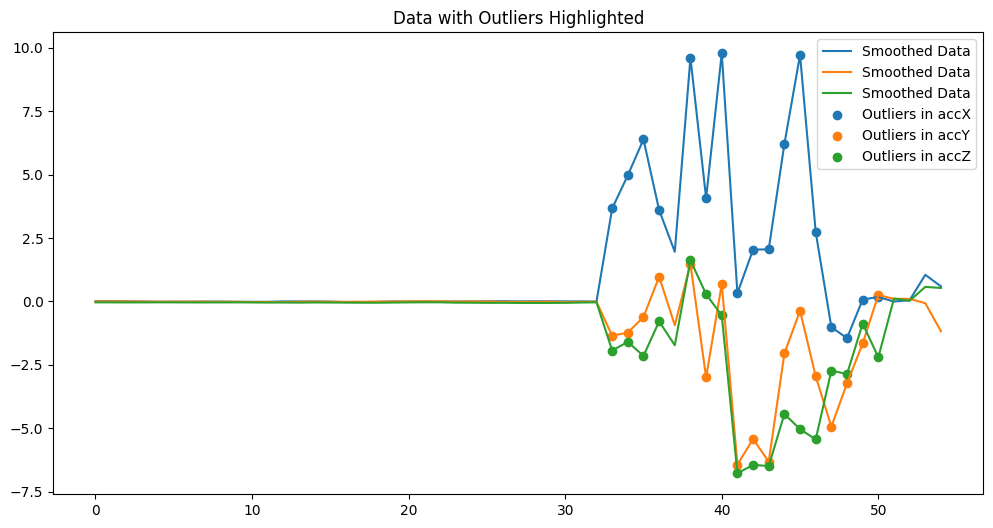

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_smoothed, label='Smoothed Data')

for col in df_smoothed.columns:
    outlier_idx = df_smoothed.index[outlier_mask]
    outlier_vals = df_smoothed.loc[outlier_mask, col]
    plt.scatter(outlier_idx, outlier_vals, label=f'Outliers in {col}')

plt.legend()
plt.title('Data with Outliers Highlighted')
plt.show()


In [33]:
print("Outlier rows:")
print(df_smoothed[outlier_mask].head(10))


Outlier rows:
        accX      accY      accZ
33  3.668215 -1.349762 -1.931552
34  4.974188 -1.225000 -1.591130
35  6.388172 -0.612565 -2.146250
36  3.603821  0.978202 -0.782648
38  9.601167  1.475369  1.627180
39  4.074967 -2.992513  0.285692
40  9.783223  0.686571 -0.546913
41  0.326772 -6.429398 -6.770438
42  2.044965 -5.419299 -6.440499
43  2.055220 -6.313533 -6.483044


In [37]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)

# Print summary statistics to verify normalization
print("Normalized Data (mean ~ 0, std ~ 1):")
print(df_scaled.describe().round(2))  # Rounded for better readability


Normalized Data (mean ~ 0, std ~ 1):
        accX   accY   accZ
count  38.00  38.00  38.00
mean    0.00   0.00   0.00
std     1.01   1.01   1.01
min    -0.33  -4.68  -5.46
25%    -0.28   0.18   0.01
50%    -0.25   0.21   0.04
75%    -0.25   0.25   0.04
max     5.16   0.68   2.04


In [39]:
# Save the preprocessed data
output_path = os.path.join(folder_path,"preprocessed_sensor_data.csv")
df_scaled.to_csv(output_path, index=False)



In [40]:
# Return preview
df_scaled.head()


,accX,accY,accZ
0,-0.235401,0.256034,0.048373
1,-0.219909,0.272092,0.044465
2,-0.245417,0.250846,0.039571
3,-0.264488,0.228967,0.041181
4,-0.299390,0.222553,0.049303
